In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load Dataset
df = pd.read_csv("diabetic_data.csv")

# Step 3: Initial Dataset Overview
print("First 5 Rows of Dataset:")
print(df.head(), "\n")

First 5 Rows of Dataset:
   encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                6.0                      25.0                  1.0   
1                1.0                       1.0                  7.0   
2                1.0                       1.0                  7.0   
3                1.0                       1.0                  7.0   
4                1.0                       1.0                  7.0   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0               1.0  ...          No    

In [4]:
print("Dataset Shape (rows, columns):", df.shape)
print("\nColumn Names:\n", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nNumber of Missing Values in Each Column:\n", df.isnull().sum())
print("\nUnique Values per Column:\n", df.nunique())

Dataset Shape (rows, columns): (77599, 50)

Column Names:
 ['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']

Data Types:
 encounter_id                  int64
patient_nbr                   int64
race                         object
g

In [6]:
# Drop ID Columns (Not useful for prediction)
df.drop(['encounter_id', 'patient_nbr'], axis=1, inplace=True)

In [8]:
# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

In [10]:
#  Target Variable Encoding
# '<30' means readmitted within 30 days → 1, otherwise → 0
df['readmitted'] = df['readmitted'].apply(lambda x: 1 if x == '<30' else 0)

In [14]:
# Step Missing Value Handling
# Drop columns with more than 50% missing data
df.dropna(thresh=len(df) * 0.5, axis=1, inplace=True)

In [16]:
# Fill remaining NaNs with mode (most frequent value)
df.fillna(df.mode().iloc[0], inplace=True)

print("\nMissing Values After Cleaning:\n", df.isnull().sum().sum())


Missing Values After Cleaning:
 0


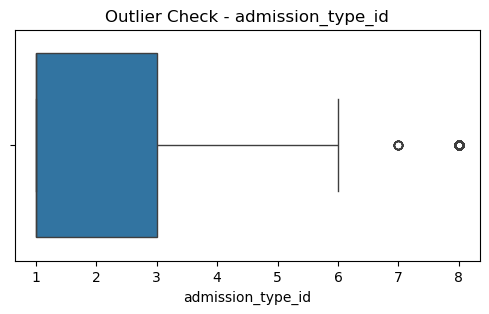

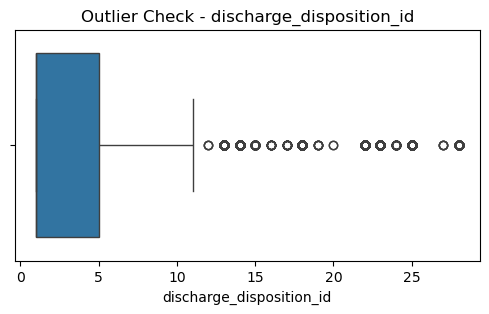

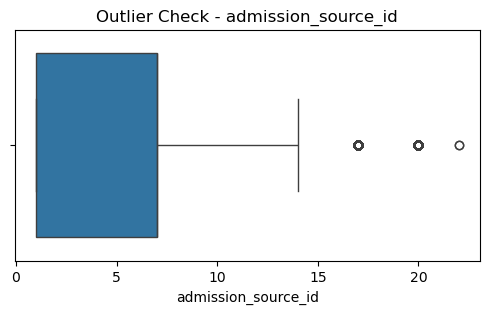

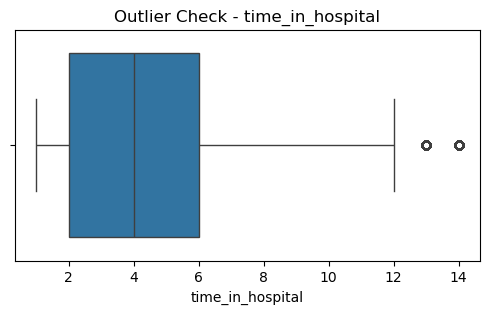

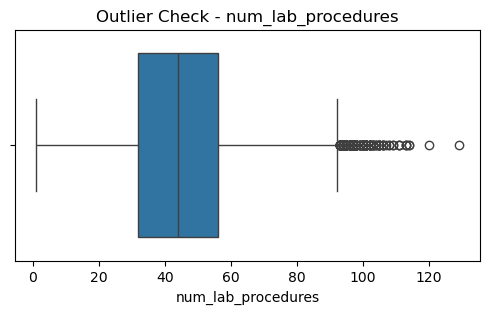

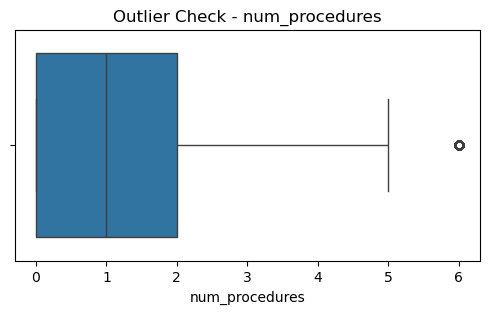

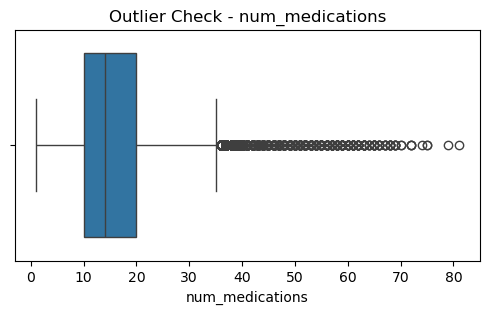

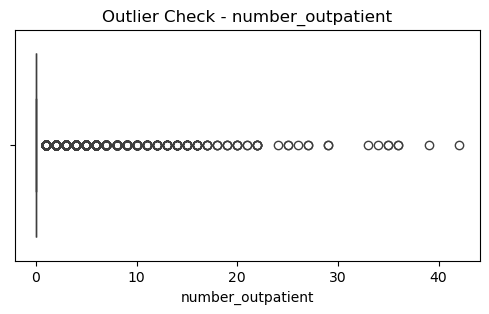

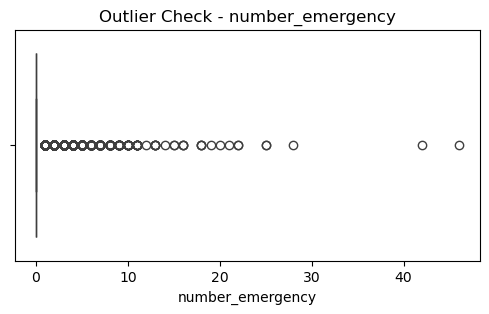

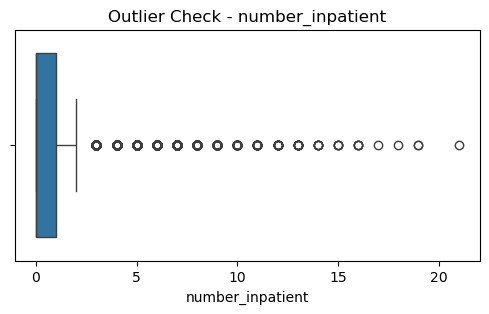

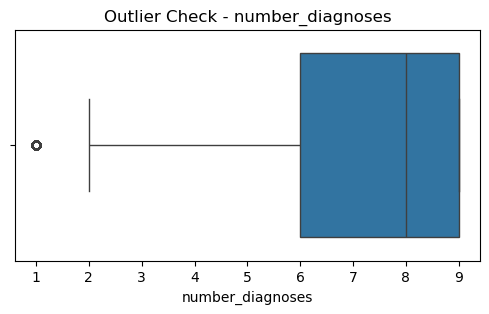

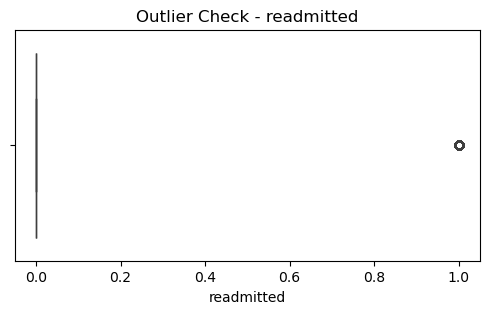

In [18]:
# Step 8: Outlier Detection (Numerical Columns)
numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f"Outlier Check - {col}")
    plt.show()


In [20]:
#  One-Hot Encoding for Categorical Variables
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [22]:
# Final Dataset Shape
print("\nShape After Preprocessing:", df.shape)


Shape After Preprocessing: (77599, 2296)


In [25]:
#Save Cleaned Dataset
df.to_csv("diabetic_data_cleaned.csv", index=False)
print("\nCleaned dataset saved as 'diabetic_data_cleaned.csv'")


Cleaned dataset saved as 'diabetic_data_cleaned.csv'


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np


# Replace 'target_column' with the actual column name
X = df.drop('target_column', axis=1)
y = df['target_column']


KeyError: "['target_column'] not found in axis"

In [29]:
df.head()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,glimepiride-pioglitazone_Steady,change_No,diabetesMed_Yes
0,6.0,25.0,1.0,1.0,41.0,0.0,1.0,0.0,0.0,0.0,...,True,False,False,True,False,False,False,False,True,False
1,1.0,1.0,7.0,3.0,59.0,0.0,18.0,0.0,0.0,0.0,...,False,False,True,True,False,False,False,False,False,True
2,1.0,1.0,7.0,2.0,11.0,5.0,13.0,2.0,0.0,1.0,...,True,False,False,True,False,False,False,False,True,True
3,1.0,1.0,7.0,2.0,44.0,1.0,16.0,0.0,0.0,0.0,...,False,False,True,True,False,False,False,False,False,True
4,1.0,1.0,7.0,1.0,51.0,0.0,8.0,0.0,0.0,0.0,...,False,True,False,True,False,False,False,False,False,True


In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

In [33]:
# 1) Choose numeric target for regression
target_col = 'time_in_hospital' 

if target_col not in df.columns:
    raise ValueError(f"Target column '{target_col}' not found in df.columns. Available numeric columns: {df.select_dtypes(include=[np.number]).columns.tolist()}")

# 2) Prepare X and y
X = df.drop(columns=[target_col])
y = df[target_col].astype(float)


In [35]:
# If X still has boolean (True/False) convert to int, and ensure no object columns remain
# Convert booleans to ints
bool_cols = X.select_dtypes(include=['bool']).columns.tolist()
if bool_cols:
    X[bool_cols] = X[bool_cols].astype(int)

# If any object columns remain (rare if you one-hot encoded earlier), raise to let you fix
obj_cols = X.select_dtypes(include=['object']).columns.tolist()
if obj_cols:
    print("Warning: object columns found in features. Consider encoding them first:", obj_cols)


In [37]:
# 3) Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [39]:
# 4) Scale features where necessary (SVR benefits from scaling). We'll create scaled copies.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include=[np.number]))
X_test_scaled = scaler.transform(X_test.select_dtypes(include=[np.number]))


In [40]:
# For models that accept pandas input, we'll use original numeric DataFrames
X_train_num = X_train.select_dtypes(include=[np.number])
X_test_num = X_test.select_dtypes(include=[np.number])

In [41]:
# 5) Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1),
    "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=200, random_state=42),
    "Support Vector Regressor": SVR()
}

In [ ]:

# 6) Train & Evaluate
results = []
for name, model in models.items():
    print(f"Training {name} ...")
    # For SVR use scaled numeric arrays (it requires scaling and array input)
    if name == "Support Vector Regressor":
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        # For other models use numeric DataFrames (already numeric)
        model.fit(X_train_num, y_train)
        y_pred = model.predict(X_test_num)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    results.append({
        "Model": name,
        "R2": r2,
        "MSE": mse,
        "MAE": mae
    })

Training Linear Regression ...
Training Decision Tree Regressor ...
Training Random Forest Regressor ...
Training Gradient Boosting Regressor ...
Training Support Vector Regressor ...


In [ ]:
# 7) Results DataFrame & best model
results_df = pd.DataFrame(results).sort_values(by='R2', ascending=False).reset_index(drop=True)
print("\nModel Comparison (sorted by R2):")
print(results_df)

best_row = results_df.iloc[0]
print("\nBest model by R2:", best_row['Model'])
print("R2: {:.4f}, MSE: {:.4f}, MAE: {:.4f}".format(best_row['R2'], best_row['MSE'], best_row['MAE']))
